In [67]:
from sqlalchemy import create_engine
import api_keys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [20]:
DB_USER = api_keys.DB_USER
DB_PASS = api_keys.DB_PASS
DB_URL = api_keys.DB_URL

engine = create_engine("mysql+pymysql://{0}:{1}@{2}".format(DB_USER, DB_PASS, DB_URL), echo=True) 
connection = engine.connect()

statement = """SELECT * FROM dublin_bikes.availability
                    order by time_queried desc
                    limit 500;""" # create select statement for stations table

2021-03-20 12:29:43,752 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'sql_mode'
2021-03-20 12:29:43,752 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 12:29:43,882 INFO sqlalchemy.engine.base.Engine SHOW VARIABLES LIKE 'lower_case_table_names'
2021-03-20 12:29:43,882 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 12:29:44,122 INFO sqlalchemy.engine.base.Engine SELECT DATABASE()
2021-03-20 12:29:44,122 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 12:29:44,362 INFO sqlalchemy.engine.base.Engine show collation where `Charset` = 'utf8mb4' and `Collation` = 'utf8mb4_bin'
2021-03-20 12:29:44,362 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 12:29:44,482 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS CHAR(60)) AS anon_1
2021-03-20 12:29:44,482 INFO sqlalchemy.engine.base.Engine {}
2021-03-20 12:29:44,602 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS CHAR(60)) AS anon_1
2021-03-20 12:29:44,612 INFO sqlalchemy.engine.base.E

In [16]:
df = pd.read_sql_query(statement, engine) # https://stackoverflow.com/questions/29525808/sqlalchemy-orm-conversion-to-pandas-dataframe

2021-03-20 12:28:25,583 INFO sqlalchemy.engine.base.Engine SELECT * FROM dublin_bikes.availability
                    order by time_queried desc
                    limit 500;
2021-03-20 12:28:25,583 INFO sqlalchemy.engine.base.Engine {}


In [68]:
df.shape

(500, 6)

In [18]:
df.head(5)

,number,available_bikes,available_bike_stands,last_update,station_status,time_queried
0,29,6,23,2021-03-20 12:23:13,OPEN,2021-03-20 12:26:11
1,53,17,23,2021-03-20 12:21:45,OPEN,2021-03-20 12:26:11
2,97,22,18,2021-03-20 12:21:25,OPEN,2021-03-20 12:26:11
3,115,15,15,2021-03-20 12:17:32,OPEN,2021-03-20 12:26:11
4,24,7,13,2021-03-20 12:17:20,OPEN,2021-03-20 12:26:11


In [19]:
df.tail(5)

,number,available_bikes,available_bike_stands,last_update,station_status,time_queried
495,61,10,15,2021-03-20 12:02:45,OPEN,2021-03-20 12:06:06
496,67,5,35,2021-03-20 12:05:08,OPEN,2021-03-20 12:06:06
497,49,4,36,2021-03-20 11:56:35,OPEN,2021-03-20 12:06:06
498,8,11,19,2021-03-20 11:57:42,OPEN,2021-03-20 12:06:06
499,58,13,27,2021-03-20 12:03:28,OPEN,2021-03-20 12:06:06


In [21]:
df.dtypes

number                            int64
available_bikes                   int64
available_bike_stands             int64
last_update              datetime64[ns]
station_status                   object
time_queried             datetime64[ns]
dtype: object

In [32]:
categorical_columns = df[['number','station_status']].columns
# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

continuous_columns = df.select_dtypes(['int64']).columns
datetime_columns = df.select_dtypes(['datetime64[ns]']).columns

df.dtypes

number                         category
available_bikes                   int64
available_bike_stands             int64
last_update              datetime64[ns]
station_status                 category
time_queried             datetime64[ns]
dtype: object

In [33]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  0
Number of duplicate rows (including first) in the table is: 0


In [34]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


# no duplicate rows or columns

In [35]:
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
number,500,109,61,5
station_status,500,1,OPEN,500


# station_status is constant column

In [36]:
df.select_dtypes(include=['int64']).describe().T

,count,mean,std,min,25%,50%,75%,max
available_bikes,500.0,10.848,5.824839,0.0,7.0,10.0,15.0,27.0
available_bike_stands,500.0,21.200,9.122194,2.0,14.0,21.0,28.0,40.0


In [37]:
df.select_dtypes(include=['datetime64[ns]']).describe().T

,count,unique,top,freq,first,last
last_update,500,302,2021-03-20 12:15:11,4,2021-03-20 11:55:37,2021-03-20 12:25:38
time_queried,500,5,2021-03-20 12:11:07,109,2021-03-20 12:06:06,2021-03-20 12:26:11


In [38]:
df.isnull().sum()

number                   0
available_bikes          0
available_bike_stands    0
last_update              0
station_status           0
time_queried             0
dtype: int64

# logical integrity

In [39]:
test_1 = df[['time_queried','last_update']][df['time_queried']<df['last_update']]
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  0


,time_queried,last_update


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019E894CDE20>],
      dtype=object)

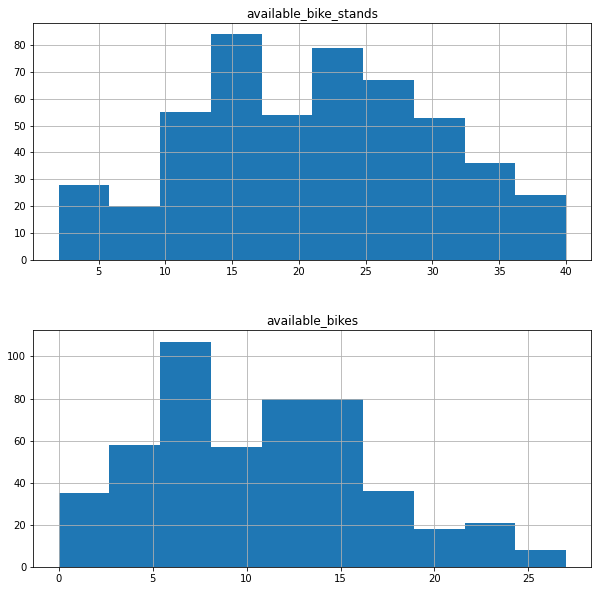

In [43]:
df[continuous_columns].hist(layout=(2, 1), figsize=(10,10), bins=10)

available_bikes             AxesSubplot(0.125,0.125;0.352273x0.755)
available_bike_stands    AxesSubplot(0.547727,0.125;0.352273x0.755)
dtype: object

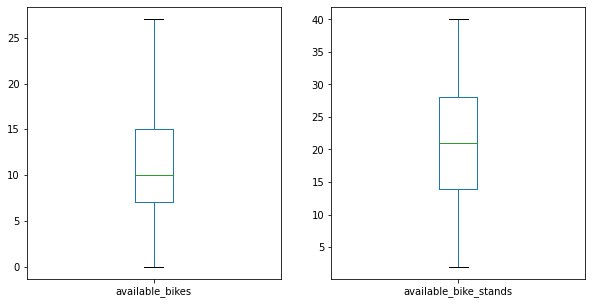

In [48]:
df[continuous_columns].plot(kind='box', subplots=True, figsize=(10,5), layout=(1,2), sharex=False, sharey=False)

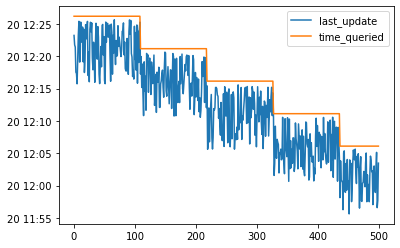

In [57]:
df[datetime_columns].plot()

last_update


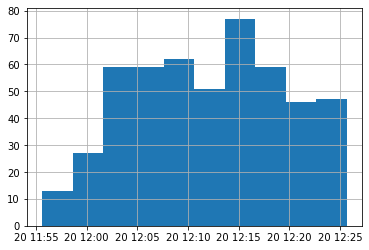

In [65]:
print(datetime_columns[0])
df[datetime_columns[0]].hist()

time_queried


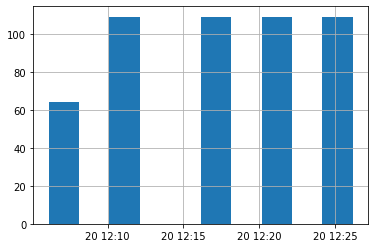

In [66]:
print(datetime_columns[1])
df[datetime_columns[1]].hist()

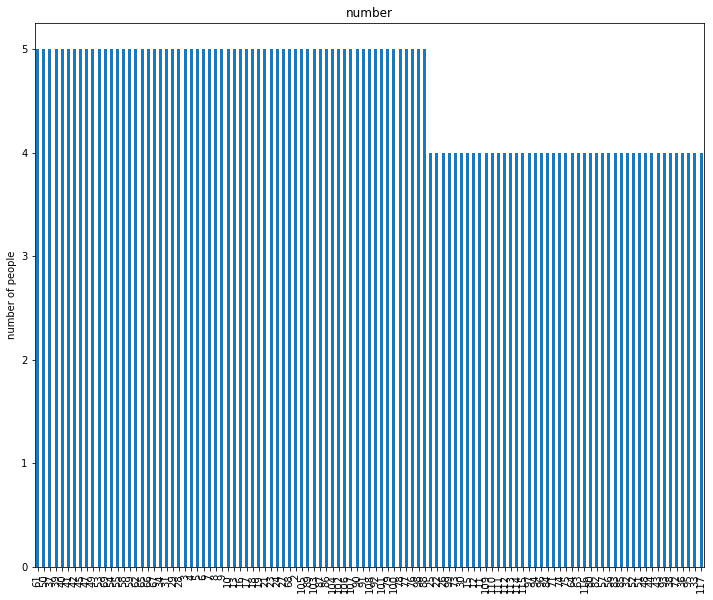

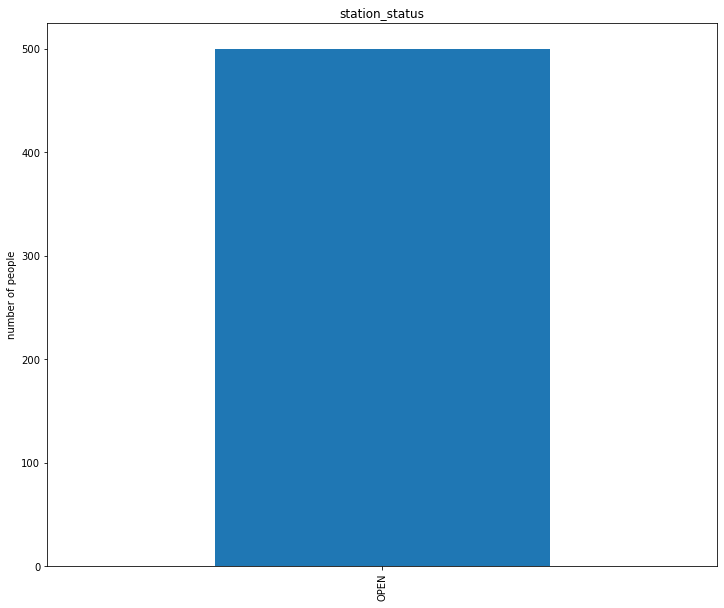

In [52]:
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
    plt.title(col)
    plt.ylabel('number of occurances')
    plt.show()